##Digit Recognizer

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Import Libraries

In [ ]:
# import the necessary libraries
import pandas as pd #library to work on dataframes
import numpy as np # For Array and Matrix
from sklearn.model_selection import train_test_split # For Splitting Data
from sklearn import metrics # For Accuracy
import math  
import matplotlib.pyplot as plt #visualizing results
import tensorflow as tf 
from tensorflow import keras
from google.colab import files
!pip install visualkeras
import visualkeras


In [ ]:
# displays output inline
%matplotlib inline

## Importing Data using Kaggle API

In [ ]:
#the below function sets all the dependencies to download data from kaggle
def import_Kaggle():
  !pip install kaggle
  from google.colab import files
  files.upload()
  ! mkdir ~/.kaggle
  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json
  ! kaggle competitions download -c 'digit-recognizer'
  ! mkdir train
  ! unzip digit-recognizer.zip -d train

In [ ]:
#please upload a kaggle.json file for a active API Token
import_Kaggle()

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘train’: File exists
Archive:  digit-recognizer.zip
replace train/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/sample_submission.csv  
replace train/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/test.csv          
replace train/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/train.csv         


In [ ]:
# Reading the train and test data from train folder
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv('/content/train/train.csv')
test=pd.read_csv('/content/train/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Scaling and reshaping the test data 
test=test.astype('float32')/255.0
test=test.values.reshape(-1,28,28)
print(test.shape)

(28000, 28, 28)


In [ ]:
# Dividing train data into independent and dependent variables
in_train = train.drop(columns=['label'])
out_train = train['label']

In [ ]:
# reshaping the train data
in_train = in_train.values.reshape(-1,28,28)

# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0

in_train.shape,  np.unique(out_train)

((42000, 28, 28), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine'])}

How many rows of training images would you like to review?1


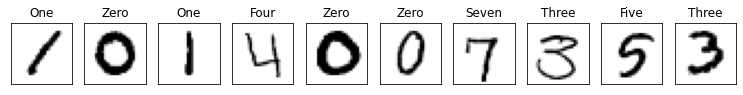

In [ ]:
#visulaizing the train data set
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    n_cols = min(10, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows *1.5))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot n rows of 10 sets images
rows = int(input("How many rows of training images would you like to review?"))
plot(in_train[:10*rows], out_train[:10*rows])   

In [ ]:
##Setting Seed Values for Consistancy in Results
np.random.seed(21)
tf.random.set_seed(21)

## Splitting the data

In [ ]:
#Dividing the data into train and validation to examine the performance of model before submitting the submission file
in_train, in_valid, out_train, out_valid = train_test_split(in_train,out_train , test_size=0.2)

## Building Neural Network

In [ ]:
#generating model
model = keras.Sequential(layers=[
    keras.layers.Conv2D(128, kernel_size=(5, 5), padding='same',input_shape=(28,28,1),activation='relu'),                             
    keras.layers.Conv2D(128, kernel_size=(5, 5), padding='same',activation='relu'),                             
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5, 5), padding='same',activation='relu'),
    keras.layers.Conv2D(128, kernel_size=(5, 5), padding='same',activation='relu'),                                                          
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy","categorical_accuracy"])
design = model.fit(in_train, out_train, batch_size=85, epochs=25, validation_split=0.2)


Epoch 1/25
317/317 [==============================] - 12s 29ms/step - loss: 0.2454 - accuracy: 0.9206 - categorical_accuracy: 0.1123 - val_loss: 0.0958 - val_accuracy: 0.9749 - val_categorical_accuracy: 0.0990
Epoch 2/25
317/317 [==============================] - 8s 26ms/step - loss: 0.0574 - accuracy: 0.9823 - categorical_accuracy: 0.0991 - val_loss: 0.0647 - val_accuracy: 0.9801 - val_categorical_accuracy: 0.0961
Epoch 3/25
317/317 [==============================] - 9s 28ms/step - loss: 0.0415 - accuracy: 0.9874 - categorical_accuracy: 0.0990 - val_loss: 0.0621 - val_accuracy: 0.9818 - val_categorical_accuracy: 0.0978
Epoch 4/25
317/317 [==============================] - 8s 26ms/step - loss: 0.0284 - accuracy: 0.9912 - categorical_accuracy: 0.0990 - val_loss: 0.0599 - val_accuracy: 0.9824 - val_categorical_accuracy: 0.0987
Epoch 5/25
317/317 [==============================] - 8s 26ms/step - loss: 0.0236 - accuracy: 0.9925 - categorical_accuracy: 0.0990 - val_loss: 0.0614 - val_accura

## Validating the performance

In [ ]:
#validating the model on the test split 
loss, accuracy, cat_acc = model.evaluate(in_valid, out_valid)

263/263 [==============================] - 2s 6ms/step - loss: 0.0446 - accuracy: 0.9910 - categorical_accuracy: 0.0968


##Model Summary

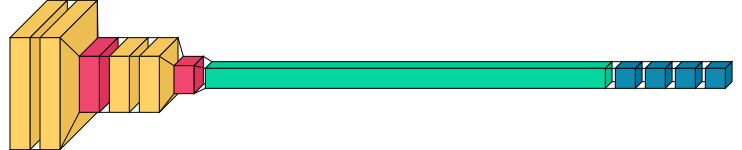

In [ ]:
#visualizing Model
visualkeras.layered_view(model, to_file='output.png')

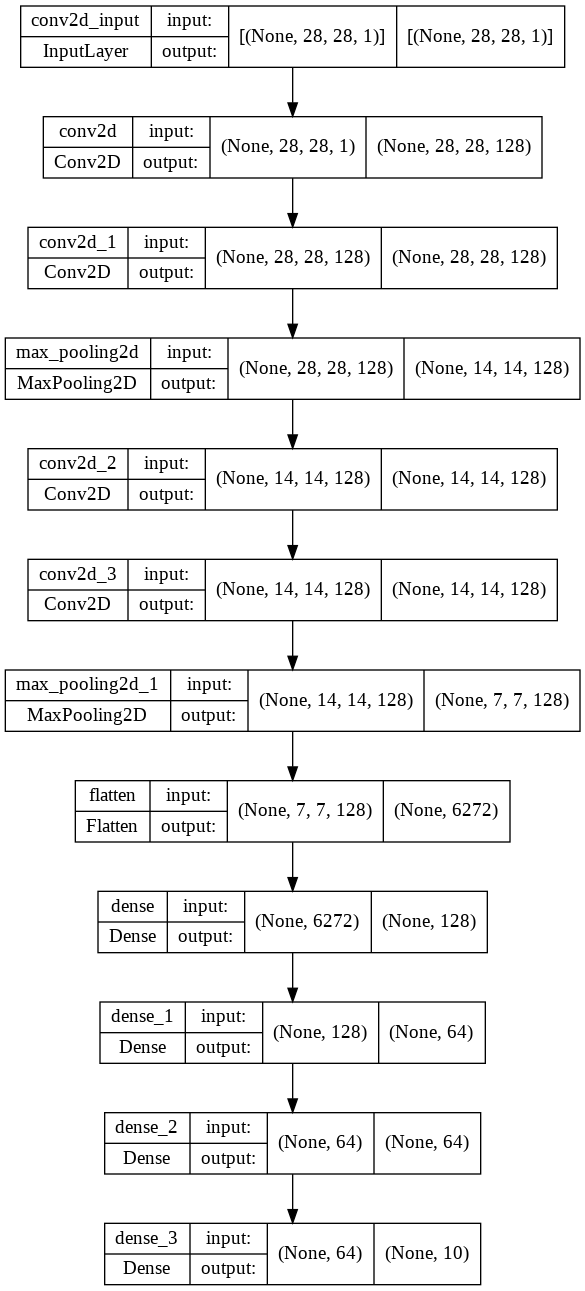

In [ ]:
#flow design of the netwoork model
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# predict the validation set
probs = model.predict(in_valid)
preds = model.predict(in_valid).argsort()[:,-1]
print(preds)

[1 4 2 ... 0 1 2]


##Plotting the results

How many rows of testing images would you like to review?1


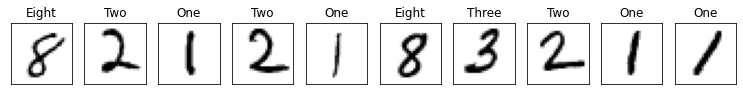

In [ ]:
# plot 10*rows random data
rows = int(input("How many rows of testing images would you like to review?")) #taking user input on number of rows
rand_idxs = np.random.permutation(len(in_valid))[:10*rows]
plot(in_valid[rand_idxs], preds[rand_idxs])

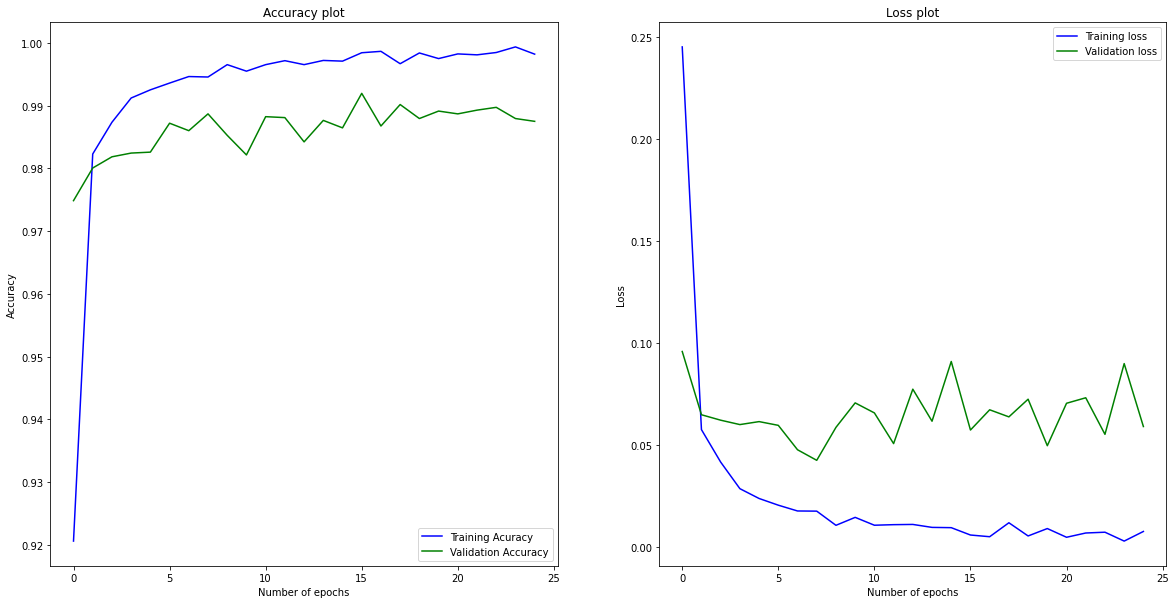

In [ ]:
#evaluation performance metrics across epochs
acc = design.history['accuracy']
val_acc = design.history['val_accuracy']
loss = design.history['loss']
val_loss = design.history['val_loss']

#plotting Training and Validation Accuracy across iterations 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(acc, color = 'blue',label = 'Training Acuracy')
plt.plot(val_acc, color = 'green',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy plot')

#plotting Training and Validation loss across itertions 
plt.subplot(1,2,2)
plt.plot(loss, color = 'blue',label = 'Training loss')
plt.plot(val_loss, color = 'green',label = 'Validation loss')
plt.legend(loc='upper right')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title('Loss plot')
plt.show()

## Application

In [ ]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    #1. increasing figsize
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    #ax1.set_title("label: %s" % class_names[out_valid[index]])
    #2. label with defined fontsize
    ax1.set_xlabel("predict: %s" % class_names[preds[index]],fontsize =12)
    #3. move the x-axis and ticks to the top of the axis
    ax1.xaxis.tick_top() 
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    plt.xticks(rotation=90)
    #4. make y axis range from 0 - 100 (% values)
    plt.ylim(1,100)
    #5. adding title to the Sub Plot
    ax2.set_title("Percentage(%) Prediction of Number")
    #6. Main Title
    plt.suptitle("Test Data Images and Predicition Accuracies",fontsize = 20,fontweight = "bold")

interactive(children=(IntSlider(value=0, description='Image index', max=8399), Output()), _dom_classes=('widge…

## Preparing the submission file

In [ ]:
# predicting the test file
submission_label = np.argmax(model.predict(test), axis=1)
submission_label = pd.Series(submission_label, name="Label")
# Creating a series to export to csv
image_id = pd.Series(range(1,len(test)+1))
image_id = pd.Series(image_id, name="ImageId")

In [ ]:
# the submission file will be downloaded to the browser's download location
submission = pd.concat([image_id,submission_label],axis = 1)
submission.to_csv("submission_v90.csv", index=False)
pd.read_csv("submission_v90.csv").head()
files.download('submission_v90.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>